In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from ieee118_bus import keep_importent_info


In [2]:
Vfl, Vfg, Vf, p, q, v, th, lines, g, b, B = keep_importent_info();

In [3]:
def P(v,th,g,b,i):
    sum = 0.
    
    for j in range(len(Vf)):
        thij = th[i] - th[j]
        sum += v[i] * v[j] * ( g[i,j] * np.cos(thij) + b[i,j] * np.sin(thij) )
        
    return sum

def Q(v,th,g,b,i):
    sum = 0.
    
    for j in range(len(Vf)):
        thij = th[i] - th[j]
        sum += v[i] * v[j] * ( g[i,j] * np.sin(thij) - b[i,j] * np.cos(thij) )
        
    return sum

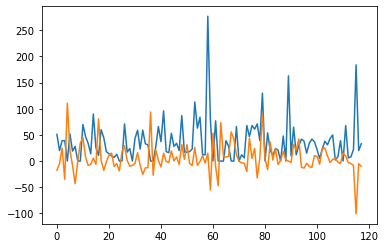

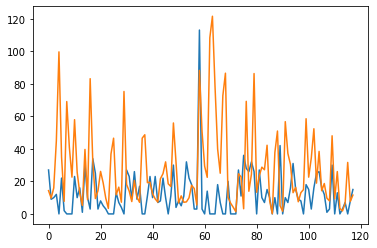

In [4]:
Papprox = np.zeros(len(p))
Qapprox = np.zeros(len(p))


for i in range(len(Vf)):
    Papprox[i] = P(v,th,g,b,i)
    Qapprox[i] = Q(v,th,g,b,i)
    
perror = p - Papprox
qerror = q - Qapprox

plt.plot(p)
plt.plot(Papprox)
plt.show()

plt.plot(q)
plt.plot(Qapprox)
plt.show()